<a href="https://colab.research.google.com/github/YousraMashkoor/Baby-births-Data-Analysis/blob/master/monty_assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!unzip "csvFiles.zip" 

## Full Data set

In [ ]:

##creating list with all the file names
fnames=["csvFiles/yob{}.csv".format(i) for i in range(1991,2011)]

##initializing an empty dataframe
full_data=pd.DataFrame()
##looping to read files and concatinate into one big dataframe
for fname in fnames:
  df = pd.read_csv(fname)
  # print("size of {} is {}".format(fname, df.size))
  full_data=full_data.append(df)

full_data.reset_index(drop=True,inplace=True)
full_data.to_csv('full_data.csv')



## TASK 01

In [ ]:
#total observations
total_obs=full_data.shape[0]

## total unique names
total_unames=full_data['name'].nunique()

## total births
total_births=full_data['births'].sum()

##printing observation

print(" total observation: {} \n total unique names: {} \n total births: {}".format(total_obs,total_unames,total_births))

 total observation: 596931 
 total unique names: 66648 
 total births: 75509584


### Table01

In [ ]:
pd.set_option('display.max_rows', 100)

##mean birth per unique name
x=full_data.groupby("name")['births'].mean()

## total births
y=full_data.groupby("name")['births'].sum()

table1=pd.DataFrame({'name':x.index, 'total_births': y.values, 'avg_births': x.values})

table1

,name,total_births,avg_births
0,Aaban,20,6.666667
1,Aabid,5,5.000000
2,Aabriella,5,5.000000
3,Aadam,123,7.235294
4,Aadan,69,13.800000
...,...,...,...
66643,Zyshonne,101,16.833333
66644,Zytavious,43,6.142857
66645,Zyvion,5,5.000000
66646,Zyyanna,6,6.000000


## TASK 02

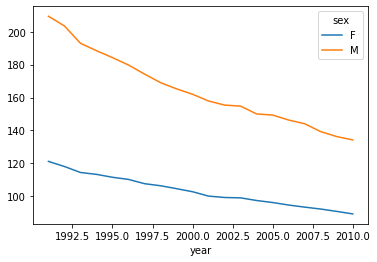

In [ ]:
full_data.pivot_table( 'births', ['year'], 'sex').plot()

# TASK 03

In [ ]:
subset=full_data[full_data.year == 2000]

In [ ]:
group=subset.pivot_table( 'births', ['name'], 'sex')

#subsetting male and female from pivot table above
subset_male=group['M'].dropna()
subset_female=group['F'].dropna()

In [ ]:
## Female top 3 and bottom 3 subset
table_f=subset_female.head(3)
table_f=table_f.append(subset_female.tail(3))

## Male top 3 and bottom 3 subset
table_m=subset_male.head(3)
table_m=table_m.append(subset_male.tail(3))

In [ ]:
#Apeending male dataset in table 2
table2=pd.DataFrame({'name':table_m.index, 'births':table_m.values ,'sex': 'M'})
#Apeending female dataset in table 2
table2=table2.append(pd.DataFrame({'name':table_f.index, 'births':table_f.values ,'sex': 'F'}))

## reassigning index
table2.reset_index(drop=True,inplace=True)

table2

,name,births,sex
0,Aadam,6.0,M
1,Aadarsh,5.0,M
2,Aadil,9.0,M
3,Zyshaun,6.0,M
4,Zyshawn,10.0,M
5,Zyshonne,17.0,M
6,Aailyah,9.0,F
7,Aaisha,6.0,F
8,Aakilah,7.0,F
9,Zyonna,5.0,F


## TASK 04

## Getting top names

In [ ]:
#filter based on gender with highest births

highest_births=full_data.groupby(['sex'])['births'].max()

In [ ]:
top_names=pd.DataFrame()
for x in highest_births:
  top_names=top_names.append((full_data.loc[full_data['births'] == x]))

In [ ]:
print(top_names)

          name sex  births  year
0       Ashley   F   43482  1991
15461  Michael   M   60780  1991


# Filtering data with top 2 names of male and female each

In [ ]:
 new= full_data[full_data.name == 'Ashley']
 new=new.append(full_data[full_data.name == 'Michael'])
 new

,name,sex,births,year
0,Ashley,F,43482,1991
16222,Ashley,M,180,1991
25102,Ashley,F,38449,1992
41511,Ashley,M,168,1992
50512,Ashley,F,34844,1993
...,...,...,...,...
513902,Michael,M,20524,2008
532324,Michael,F,41,2009
548616,Michael,M,18822,2009
567140,Michael,F,37,2010


# Visualizing trend

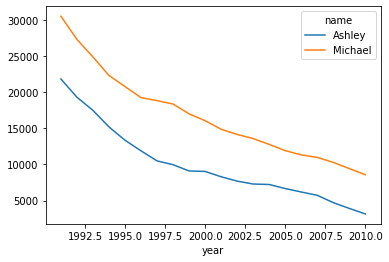

In [ ]:
new.pivot_table( 'births', ['year'], 'name').plot()